<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/Pokemon_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cement Strength Prediction**

# **1. Introduction**


**Your client (Ninja Gaming) is a consulting company that helps players improve their gaming skills...**

*  They want to identify the legendary Pokemons that are hard to identify.
*  Apart from that, they want to catch them as well.
*  The only way to identify a Legendary Pokémon is through statements from official media, such as the game or anime..


**Current Scenario:**

* Not all Pokémon are created equal. Some are consigned to mediocrity, useless in battle until they reach their more evolved states. Others – like Zapdos, Articuno and Moltres – are so unique and powerful that they have officially been classified as legendary.
* But what exactly makes a Pokémon the stuff of legend? We will answer that question with the help of the base stats, height, weight and type of 801 Pokémon from all seven generations.



# **2. Problem Statement**
**Currently, in the game PokemonGoo, a player faces these problems -**


* Legendary Pokémon are types of Pokemon species that appear in every Pokemon video game
* They are rare Pokémon that are not only hard to catch but can also be hard to find. Each game has a certain amount of Legendary Pokémon.
* The only way to identify a Legendary Pokémon is through statements from official media, such as the game or anime. This can be very tough

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**

* You are given a dataset containing information on 801 Pokemon from all Seven Generations of Pokemon.
* Your task is to build a classification model using this dataset.
* Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.



# **3. Import Libraries**

In [2]:
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# # import sklearn.linear_model.LogisticRegression as LogisticRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")


# **4. Data Acquisition & Description**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Pokemon_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Pokemon_test.csv")
dataValidationId=dataValidation.Id

data.head(10)


,Id,Pokemon_Name,Type1,Type2,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Height_M,Weight_KG,Legendary
0,791,Solgaleo,Psychic,Steel,137,137,107,113,89,97,3.4,230.0,1
1,638,Cobalion,Steel,Fighting,91,90,129,90,72,108,2.1,250.0,1
2,445,Garchomp,Dragon,Ground,108,130,95,80,85,102,1.9,95.0,0
3,333,Swablu,Normal,Flying,45,40,60,40,75,50,0.4,1.2,0
4,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,0.8,1.2,0
5,745,Lycanroc,Rock,NaN,75,115,65,55,65,112,0.8,25.0,0
6,80,Slowbro,Water,Psychic,95,75,110,100,80,30,1.6,78.5,0
7,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,2.2,210.0,0
8,437,Bronzong,Steel,Psychic,67,89,116,79,116,33,1.3,187.0,0
9,526,Gigalith,Rock,NaN,85,135,130,60,80,25,1.7,260.0,0


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               647 non-null    int64  
 1   Pokemon_Name     647 non-null    object 
 2   Type1            647 non-null    object 
 3   Type2            328 non-null    object 
 4   HP               647 non-null    int64  
 5   Attack           647 non-null    int64  
 6   Defense          647 non-null    int64  
 7   Special_Attack   647 non-null    int64  
 8   Special_Defense  647 non-null    int64  
 9   Speed            647 non-null    int64  
 10  Height_M         647 non-null    float64
 11  Weight_KG        647 non-null    float64
 12  Legendary        647 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 65.8+ KB


In [5]:
dataValidation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               162 non-null    int64  
 1   Pokemon_Name     162 non-null    object 
 2   Type1            162 non-null    object 
 3   Type2            77 non-null     object 
 4   HP               162 non-null    int64  
 5   Attack           162 non-null    int64  
 6   Defense          162 non-null    int64  
 7   Special_Attack   162 non-null    int64  
 8   Special_Defense  162 non-null    int64  
 9   Speed            162 non-null    int64  
 10  Height_M         162 non-null    float64
 11  Weight_KG        162 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 15.3+ KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,Id,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Height_M,Weight_KG,Legendary
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,407.173107,67.996909,75.574961,70.953632,69.326121,69.482226,66.058733,1.145904,58.870634,0.100464
std,234.167819,25.975935,29.656133,29.082636,29.322964,27.069214,27.886928,1.099075,101.888713,0.300850
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.100000,0.100000,0.000000
25%,197.500000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,0.500000,8.500000,0.000000
50%,412.000000,65.000000,73.000000,65.000000,65.000000,65.000000,65.000000,1.000000,26.600000,0.000000
75%,611.500000,80.000000,95.000000,89.000000,90.000000,85.000000,85.000000,1.400000,60.500000,0.000000
max,809.000000,255.000000,181.000000,200.000000,154.000000,200.000000,160.000000,14.500000,999.900000,1.000000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


**Check null value or any other inconsistent value in column**

In [7]:
print((data=="").sum(), "\n")

Id                 0
Pokemon_Name       0
Type1              0
Type2              0
HP                 0
Attack             0
Defense            0
Special_Attack     0
Special_Defense    0
Speed              0
Height_M           0
Weight_KG          0
Legendary          0
dtype: int64 



In [8]:
print(data.isna().sum(), "\n")


Id                   0
Pokemon_Name         0
Type1                0
Type2              319
HP                   0
Attack               0
Defense              0
Special_Attack       0
Special_Defense      0
Speed                0
Height_M             0
Weight_KG            0
Legendary            0
dtype: int64 



In [9]:
print((data=="Unknown").sum(), "\n")


Id                 0
Pokemon_Name       0
Type1              0
Type2              0
HP                 0
Attack             0
Defense            0
Special_Attack     0
Special_Defense    0
Speed              0
Height_M           0
Weight_KG          0
Legendary          0
dtype: int64 



In [10]:
print((data==0).sum(), "\n")

Id                   0
Pokemon_Name         0
Type1                0
Type2                0
HP                   0
Attack               0
Defense              0
Special_Attack       0
Special_Defense      0
Speed                0
Height_M             0
Weight_KG            0
Legendary          582
dtype: int64 



In [11]:
data.duplicated().any()

False

**Check distribution of numerical features and Outliers**

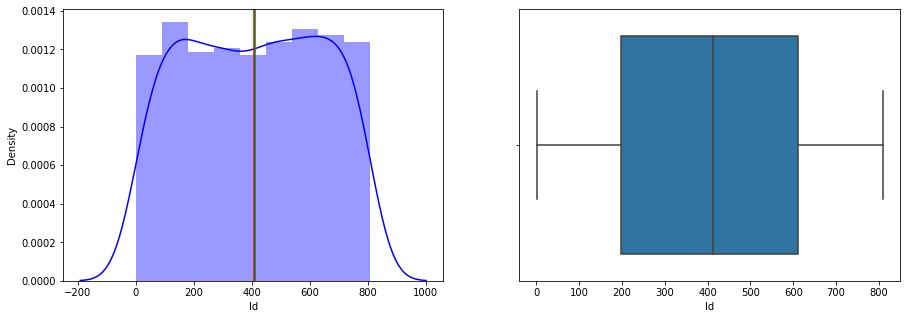

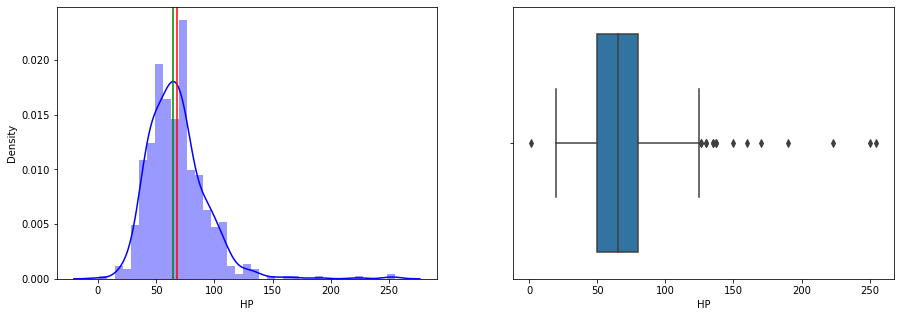

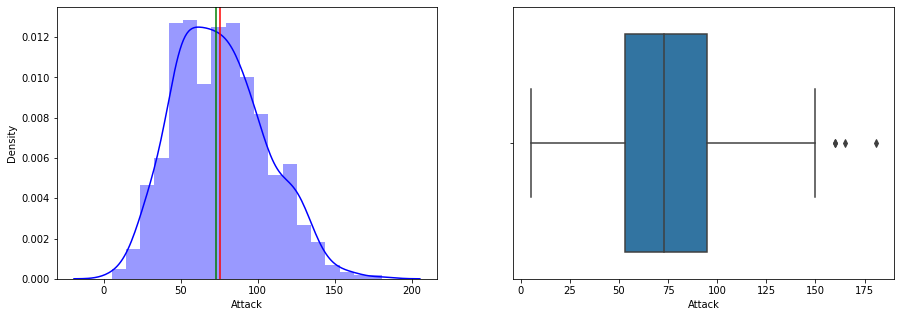

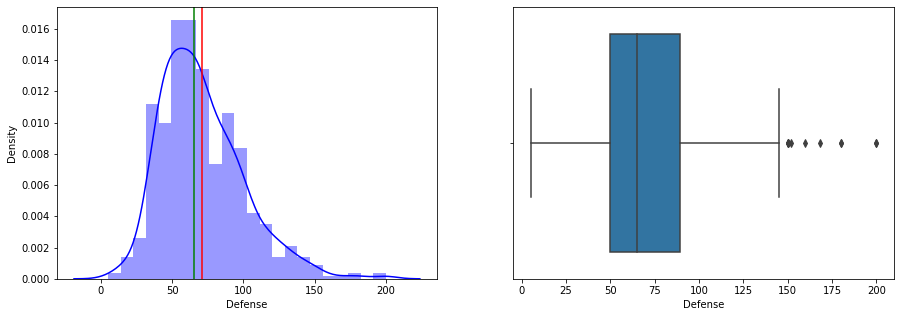

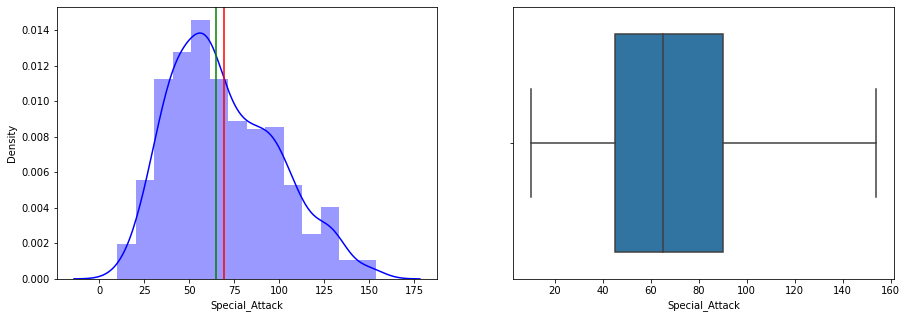

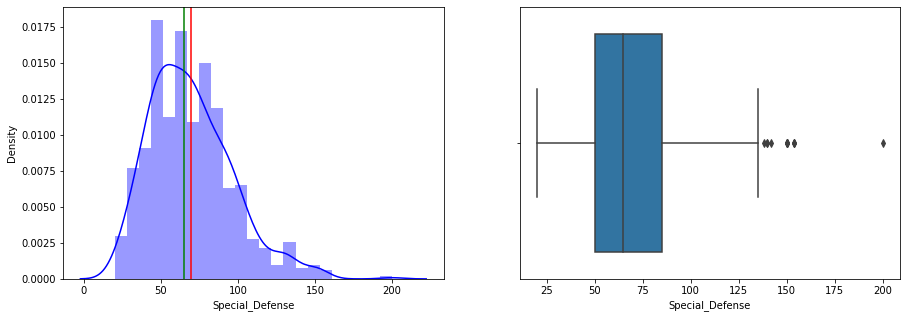

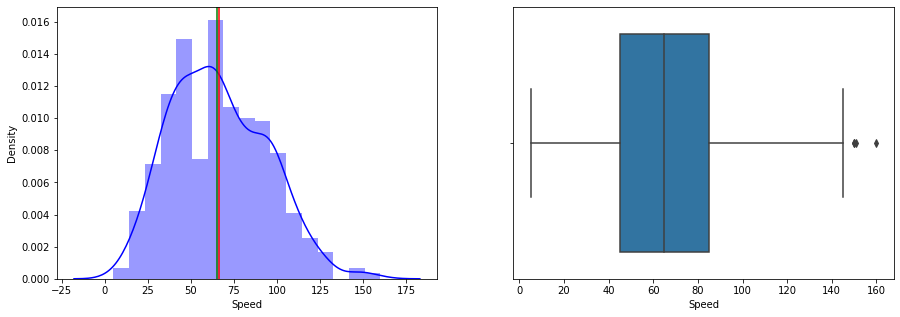

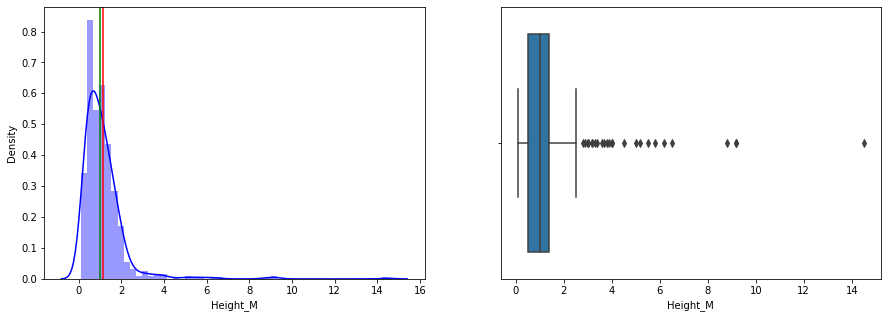

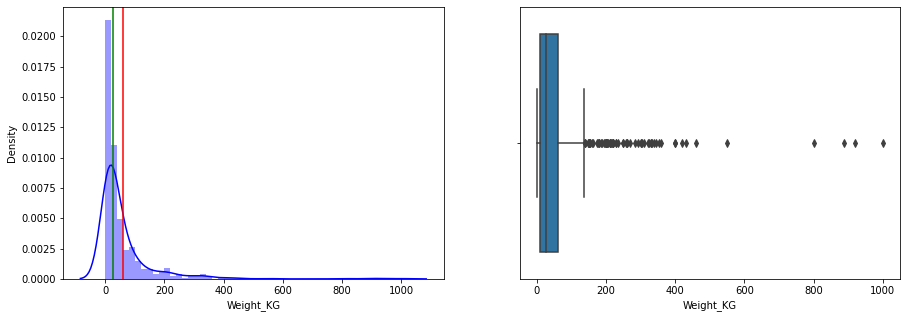

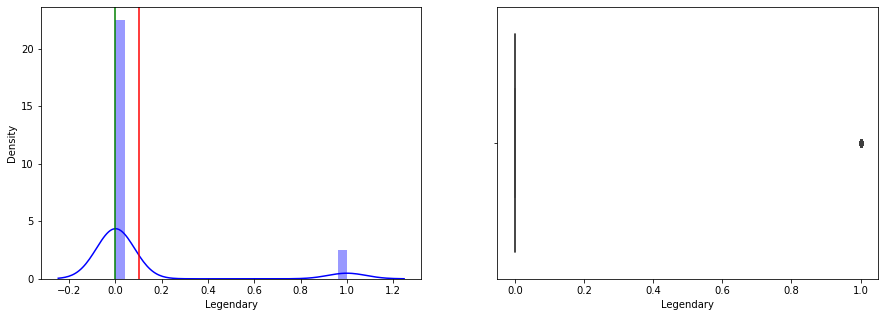

In [12]:
contColumn=data.select_dtypes(exclude=["object"])

for col in contColumn: 
  if (col !="Id") | (col!="Legendary"):
    fig=plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.distplot(data[col], color="b")
    plt.axvline(data[col].mean(), color="r")
    plt.axvline(data[col].median(), color="g")
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
  # quamtile_75=data[col].quantile(q=.75)
  # quamtile_25=data[col].quantile(q=.25)
  # iqr=quamtile_75-quamtile_25
  # lower_limit=quamtile_25-1.5*iqr
  # upper_limit=quamtile_75+1.5*iqr
  # outliers=data[col][(data[col]<lower_limit )|(data[col]>upper_limit)]
  # print("outliers in feature", col ,"are\n" ,outliers)
  # data.drop(index=outliers.index, inplace=True)

  

In [13]:
data.Type2.value_counts()

Flying      79
Ground      29
Poison      27
Fairy       26
Fighting    21
Psychic     20
Dark        16
Grass       15
Steel       14
Water       14
Ghost       14
Rock        11
Dragon      10
Ice          9
Fire         8
Electric     7
Bug          5
Normal       3
Name: Type2, dtype: int64

### **5.2 Data Cleaning**

- N/A

In [35]:

# Using simple imputer to impute type 2
# from sklearn.impute import SimpleImputer
# imp=SimpleImputer(strategy="most_frequent")
# data.Type2=imp.fit_transform(data.Type2)
data.Type2=data.Type2.replace(np.NAN,data.Type2.mode()[0] )
dataValidation.Type2=dataValidation.Type2.replace(np.NAN,dataValidation.Type2.mode()[0] )

In [15]:
data.isna().sum()

Id                 0
Pokemon_Name       0
Type1              0
Type2              0
HP                 0
Attack             0
Defense            0
Special_Attack     0
Special_Defense    0
Speed              0
Height_M           0
Weight_KG          0
Legendary          0
dtype: int64

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

In [16]:
data.Type1.value_counts()

Water       93
Normal      84
Grass       63
Bug         60
Fire        45
Psychic     43
Rock        37
Electric    32
Dark        25
Dragon      24
Poison      24
Steel       23
Ground      22
Ghost       19
Ice         19
Fighting    19
Fairy       13
Flying       2
Name: Type1, dtype: int64

### **Count of Pokemon**

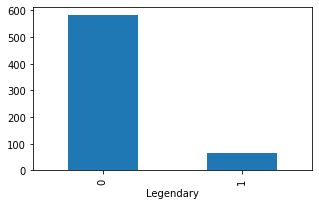

In [17]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby("Legendary")["Legendary"].count().plot.bar(figsize=[5,3])


### **Analize Relationship between Type1 and Legendry Pokemon**

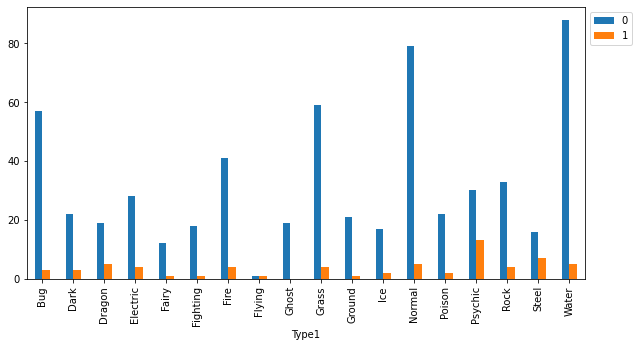

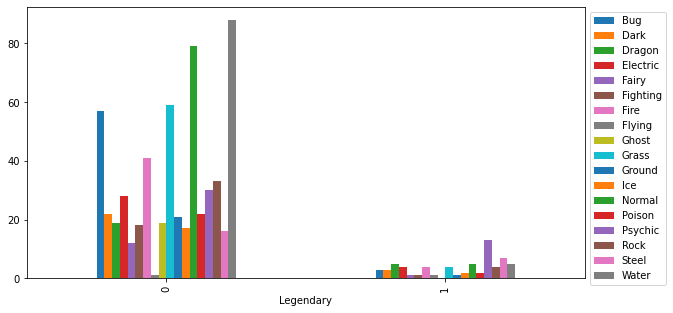

In [18]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby(["Type1","Legendary"])["Legendary"].count().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()
data.groupby(["Legendary","Type1"])["Type1"].count().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### **Analize Relationship between Type2 and Legendry Pokemon**

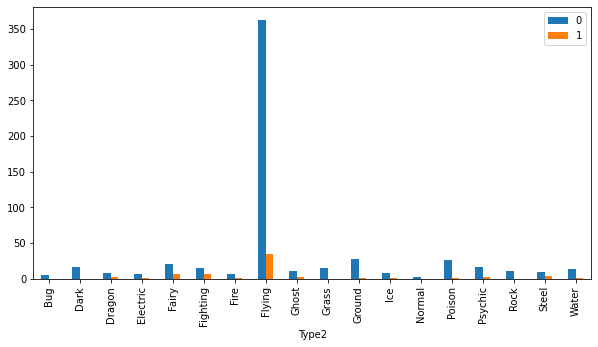

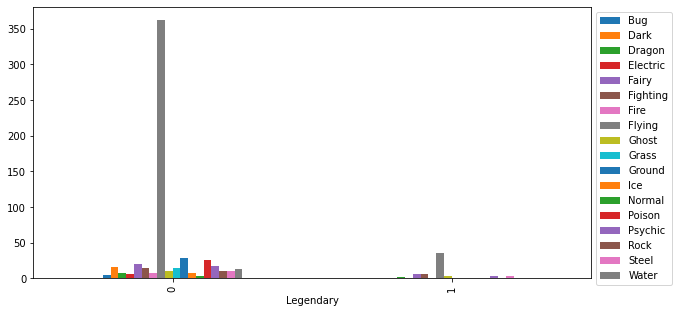

In [19]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby(["Type2","Legendary"])["Legendary"].count().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()
data.groupby(["Legendary","Type2"])["Type2"].count().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### **Analize Relationship between HP and Legendry Pokemon**

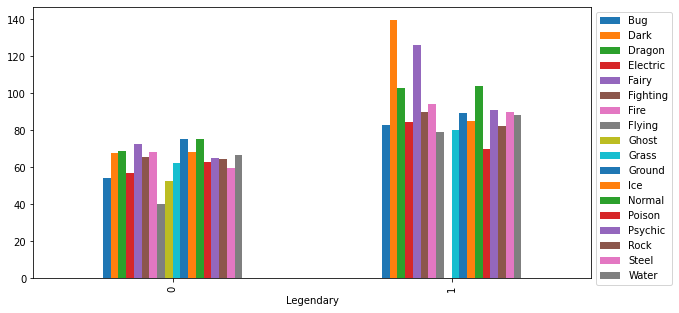

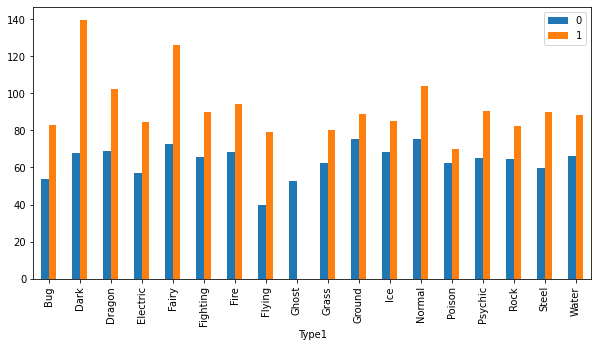

In [20]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby(["Legendary","Type1"])["HP"].mean().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()
data.groupby(["Type1","Legendary"])["HP"].mean().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

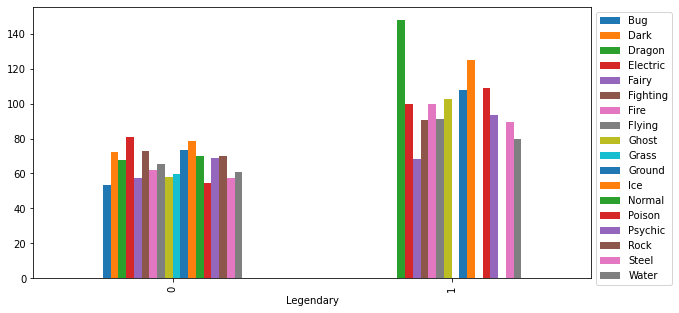

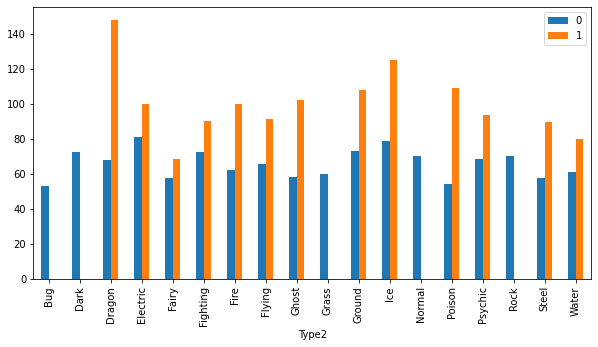

In [21]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby(["Legendary","Type2"])["HP"].mean().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()
data.groupby(["Type2","Legendary"])["HP"].mean().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [22]:
np.sort(data[data.Legendary==0].Attack.unique())

array([  5,  10,  15,  20,  23,  24,  25,  27,  29,  30,  33,  35,  36,
        38,  40,  41,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  97,  98, 100, 104, 105, 107, 108, 109, 110, 112,
       115, 117, 120, 121, 123, 124, 125, 130, 131, 132, 134, 135, 140,
       147, 150, 160, 165])

In [23]:
np.sort(data[data.Legendary==1].Attack.unique())

array([ 29,  50,  53,  65,  70,  72,  73,  75,  77,  80,  85,  90,  95,
       100, 101, 105, 110, 112, 113, 115, 120, 125, 129, 130, 131, 137,
       139, 143, 150, 160, 181])

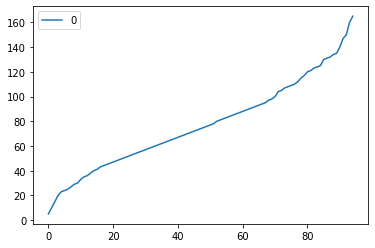

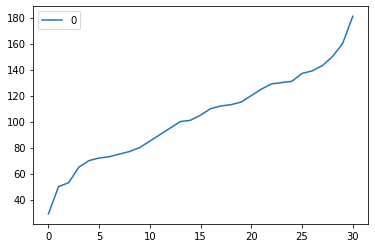

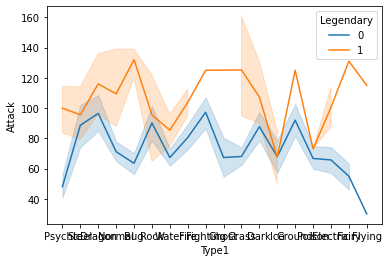

<Figure size 720x504 with 0 Axes>

In [24]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

# data.groupby(["Legendary","Type1"])["HP"].mean().unstack().plot.bar(figsize=[10,5])
# plt.legend(bbox_to_anchor=(1,1))
# plt.show()
# data.groupby(["Type1","Legendary"])["HP"].mean().unstack().plot.bar(figsize=[10,5])
# plt.legend(bbox_to_anchor=(1,1))
# plt.show()
# data[data.Legendary==1].Attack.unique().plot.line()
# plt.show()
# data[data.Legendary==0].Attack.unique().plot.line()
# plt.show()
pd.DataFrame(np.sort(data[data.Legendary==0].Attack.unique())).plot.line()
pd.DataFrame(np.sort(data[data.Legendary==1].Attack.unique())).plot.line()
plt.show()
sns.lineplot(data=data,x="Type1",y="Attack",hue="Legendary")
plt.figsize=plt.figure(figsize=[10,7])

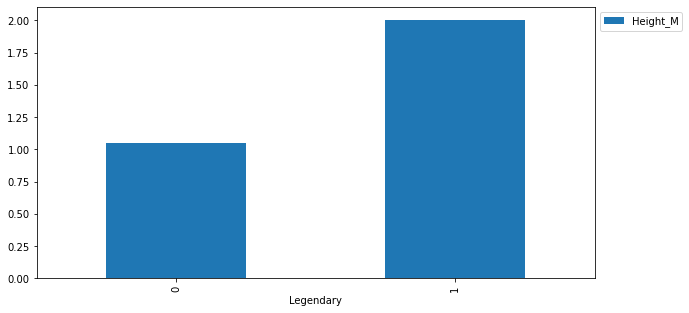

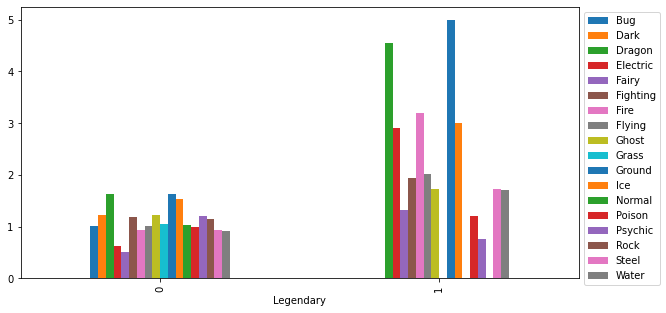

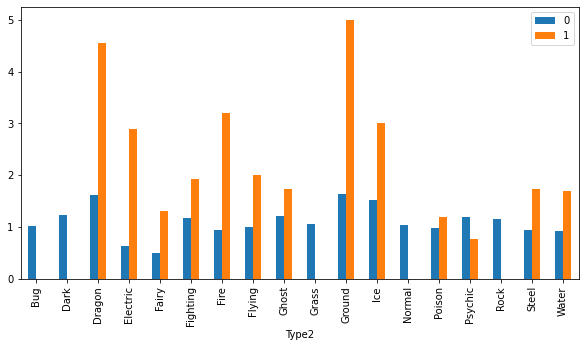

In [25]:
# sns.histplot(data=data,x="Type1",bins=10,hue="csMPa",multiple="stack",stat="count")

data.groupby(["Legendary"])["Height_M"].mean().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()
data.groupby(["Legendary","Type2"])["Height_M"].mean().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()
data.groupby(["Type2","Legendary"])["Height_M"].mean().unstack().plot.bar(figsize=[10,5])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### **Correlation Matrix**

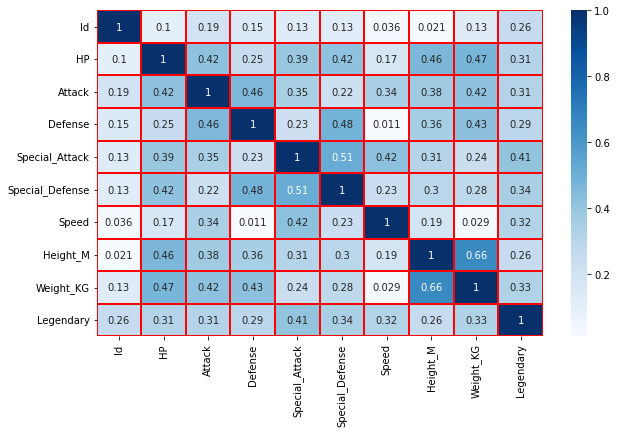

In [26]:
figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation**



In [27]:
#**Remove Irrelavent Features**
data=data.drop(["Id","Pokemon_Name"], axis=1)
dataValidation=dataValidation.drop(["Id","Pokemon_Name"], axis=1)
X=data.drop("Legendary",axis=1)
y=data.Legendary



# **8. Model Development & Evaluation**

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# Define which columns should be scaled
columns_to_scale=["HP","Attack","Defense","Special_Attack","Special_Defense","Speed","Height_M","Weight_KG"]
columns_to_encode=["Type1","Type2"]

# Instantiate column transformer
column_trans=make_column_transformer((RobustScaler(),columns_to_scale),(OneHotEncoder(),columns_to_encode))
# x_trans=pd.DataFrame(column_trans.fit_transform(X))
# x_trans
# x_trans.isna().sum()
# Instantiate Decision Tree Model
mdlList=[RandomForestClassifier(),BaggingClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
score_df=pd.DataFrame(columns=["ModelName","TrainScore","TestScore"])
for mdl in mdlList:
  # Make Pipeline
  pipe=make_pipeline(column_trans,mdl)
  cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="accuracy",return_train_score=True)
  cv_score_df=pd.DataFrame(cv_score)
  score_df=score_df.append({"ModelName":mdl,"TrainScore":cv_score_df.train_score.mean(),
                   "TestScore":cv_score_df.test_score.mean()},ignore_index=True)
  # print(cv_score_df.mean())
score_df

# dataValidation_pred=pipe.predict(dataValidation)

# submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
# from google.colab import files
# submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
# files.download('submission.csv')




,ModelName,TrainScore,TestScore
0,RandomForestClassifier(),1.000000,0.925832
1,BaggingClassifier(),0.989567,0.930447
2,AdaBoostClassifier(),0.993433,0.930495
3,GradientBoostingClassifier(),0.999613,0.941300


In [32]:
pipe=make_pipeline(column_trans,GradientBoostingClassifier())
pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('robustscaler',
                                                  RobustScaler(),
                                                  ['HP', 'Attack', 'Defense',
                                                   'Special_Attack',
                                                   'Special_Defense', 'Speed',
                                                   'Height_M', 'Weight_KG']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Type1', 'Type2'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

# **9. Dump Model using Pickle**

In [33]:
import pickle

##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/cement_model.pkl", 'wb') as f_out:
    pickle.dump(pipe, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [36]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/cement_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
# print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'csMPa':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>